In [1]:
# To install clone repo and then run setup.py
# !pip install -e C:/Users/skruz/PycharmProjects/financial-planner

# Credit Card Payment Scenario Calculator

In [2]:
%matplotlib inline
# import seaborn as sns
import matplotlib.pylab as plt
import financial_planner as fp
import pandas as pd

In [61]:
from financial_planner.entities.household import Person
from financial_planner.entities.income import Job
from financial_planner.entities.expense import Expenses


person = Person(
    age=30,
    gender='M'
)
person.add_job(Job(salary=400000, salary_growth_rate=0.02))
person.add_expense(Expenses(200))
print(person)

In [65]:
from financial_planner.entities.credit_card import CreditCard


credit_cards = [
    CreditCard([.1049, .1549], balances=[5401.99, 1014.94], balance_types=['Purchases prior to 04/26/2018','Purchases'],
               monthly_due_day=11, credit_limit=6400, name="Chase Slate", account_number="xxxx-xxxx-xxxx-1234"),
    CreditCard([.1350, .1724], balances=[8663.49, 4967.31], balance_types=['Purchases prior to 01/23/2018' ,'Purchases'],
               monthly_due_day=7, credit_limit=13700, name="Chase Freedom", account_number="xxxx-xxxx-xxxx-4567"),
    CreditCard(.1749, balances=[7000.00], monthly_due_day=12, credit_limit=7500, name="TD Card Services",
               account_number="xxxx-xxxx-xxxx-7894")
]


In [66]:
person.savings_rate

1.0

In [69]:
from financial_planner.calculators.credit.credit_card_payment_scenarios import CreditCardScenario


payment_strategies = [
    'min_payment_only',
#     'highest_rate_first',
#     'largest_balance_first',
    'smallest_balance_first',
#     'optimized'
]

scenarios = [CreditCardScenario(person=person, scenario_name=strategy) for strategy in payment_strategies]


c:\users\skruz\pycharmprojects\financial-planner\financial_planner\calculators\credit\credit_card_payment_scenarios.py:54: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ts = pd.DataFrame(None, index=index, columns=columns, dtype=pd.np.float)


In [71]:
results = []
for scenario in scenarios:
    results.append(scenario.run(credit_cards))

smallest_balance_first:  88%|████████▊ | 317/360 [00:02<00:00, 151.89it/s]


In [72]:
df_results = pd.DataFrame({r['name']: r['values'] for r in results})
df_results

,min_payment_only,smallest_balance_first
initial_balance,27047.730000,27047.730000
payments_sum,27047.730000,27047.730000
payments_sum_pv,24988.014856,25465.724816
months_to_paydown,328.000000,328.000000
months_to_paydown_85pct,94.000000,81.000000
months_to_paydown_95pct,149.000000,135.000000
months_to_paydown_99pct,228.000000,215.000000
late_fees,0.000000,0.000000
missed_payments,0.000000,0.000000


In [86]:
# ts_results = pd.DataFrame({(c, r['name']): r['ts'][c] for r in results for c in r['ts'].keys() }).set_index('')
# ts_results

tmp = pd.concat([
    pd.DataFrame(r['ts']).set_index('ref_period') for r in results
], axis=1)

df.columns = pd.MultiIndex.from_product([df.columns, ['C']])

tmp.columns.append(['test'])

TypeError: all inputs must be Index

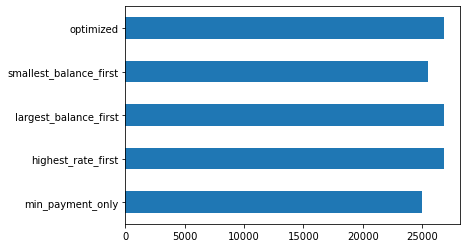

In [60]:
df_results.loc["payments_sum_pv"].plot(kind='barh')

In [51]:
df_results


,highest_rate_first
initial_balance,27047.730000
late_fees,0.000000
missed_payments,0.000000
months_to_paydown,9.000000
months_to_paydown_85pct,7.000000
months_to_paydown_95pct,8.000000
months_to_paydown_99pct,8.000000
payments_sum,27047.730000
payments_sum_pv,26846.089918
